## 1. Load the MNIST dataset using the Keras library.


In [1]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

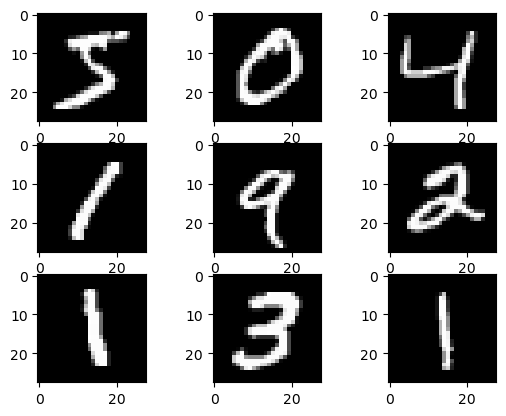

In [2]:
#VISUALIZE
from matplotlib import pyplot
for i in range(9):  
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## 2. Preprocess the dataset by flattening the images into a 1D vector, normalizing the pixel values between 0 and 1, and converting the labels into one-hot encoded vectors.

In [3]:
#Preprocessed the dataset 
import numpy as np
from keras.utils import to_categorical

# Flattened the images into a 1D vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalized pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converted labels into one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Training data shape after flattening the images", x_train.shape)
print("Test data shape after flattening the images", x_test.shape)
print("Training labels shape after encoding ", y_train.shape)
print("Test labels shape after encoding", y_test.shape)

Training data shape after flattening the images (60000, 784)
Test data shape after flattening the images (10000, 784)
Training labels shape after encoding  (60000, 10)
Test labels shape after encoding (10000, 10)


## 3.Build a neural network model using the Keras library, with an input layer, one or more hidden layers, and an output layer. The model should have a sigmoid activation function for the hidden layers and a softmax activation function for the output layer.

In [4]:
#neural network model
from keras.models import Sequential
from keras.layers import Dense

input_dim = 784  
hidden_neurons1 = 512
hidden_neurons2 = 256
output_dim = 10 

model = Sequential()

# Input layer and first hidden layer
model.add(Dense(hidden_neurons1, input_dim=input_dim, activation='sigmoid'))

# Second hidden layer
model.add(Dense(hidden_neurons2, activation='sigmoid'))

# Output layer
model.add(Dense(output_dim, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## 4.Compile the model by specifying the loss function, optimizer, and evaluation metric. Use the categorical_crossentropy loss function, the stochastic gradient descent (SGD) optimizer, and the accuracy metric.

In [5]:
from keras.optimizers import SGD

# Compiled the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

## 5.Train the model on the training dataset, using the fit() method of the Keras library. Train the model for 100 epochs and use a batch size of 128. Monitor the training progress using the validation split argument.

In [6]:
batch_size = 128
epochs = 100

# Trained the model and monitor the validation progress
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25)


Epoch 1/100
352/352 [==============================] - 3s 8ms/step - loss: 2.2747 - accuracy: 0.2005 - val_loss: 2.2411 - val_accuracy: 0.1241
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 2.2088 - accuracy: 0.3540 - val_loss: 2.1756 - val_accuracy: 0.4210
Epoch 3/100
352/352 [==============================] - 2s 7ms/step - loss: 2.1377 - accuracy: 0.4919 - val_loss: 2.0950 - val_accuracy: 0.5599
Epoch 4/100
352/352 [==============================] - 2s 7ms/step - loss: 2.0452 - accuracy: 0.5632 - val_loss: 1.9865 - val_accuracy: 0.6363
Epoch 5/100
352/352 [==============================] - 3s 7ms/step - loss: 1.9223 - accuracy: 0.6085 - val_loss: 1.8457 - val_accuracy: 0.6209
Epoch 6/100
352/352 [==============================] - 2s 7ms/step - loss: 1.7681 - accuracy: 0.6445 - val_loss: 1.6764 - val_accuracy: 0.6562
Epoch 7/100
352/352 [==============================] - 2s 7ms/step - loss: 1.5922 - accuracy: 0.6773 - val_loss: 1.4927 - val_accuracy: 0.6876

## 6.Evaluate the model on the test dataset, using the evaluate() method of the Keras library. This will return the test loss and accuracy.

In [7]:
# Evaluated the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Printed the test loss and accuracy
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.9178
Test loss: 0.28848370909690857
Test accuracy: 0.9178000092506409


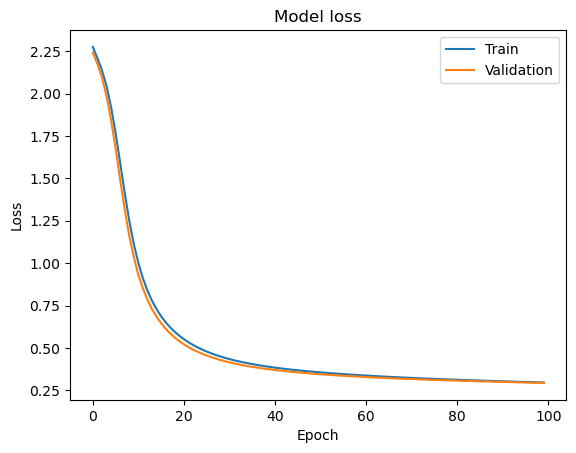

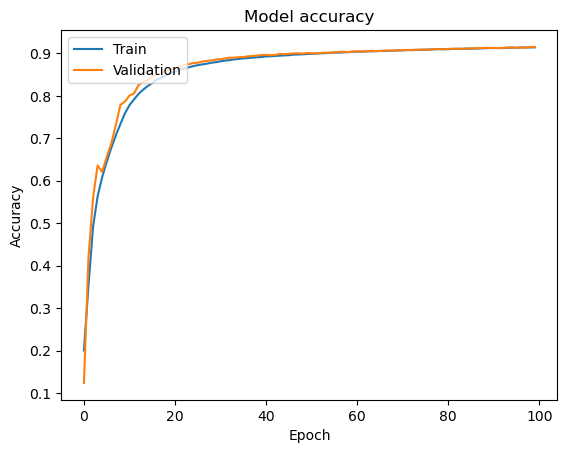

In [8]:
import matplotlib.pyplot as plt

# Plotting training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting training & validation accuracy values
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
#predict on test data
predictions = model.predict(x_test[:15])
print('Predictions:',predictions.argmax(axis=1))
print('True Labels:',y_test[:15].argmax(axis=1))

1/1 [==============================] - 0s 76ms/step
Predictions: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1]
True Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


## 7.Test the model on new images of handwritten digits, by preprocessing the images and using the predict() method of the Keras library to obtain the predicted class label. You can use any image of a handwritten digit that you find online or draw your own digit using a drawing tool. 

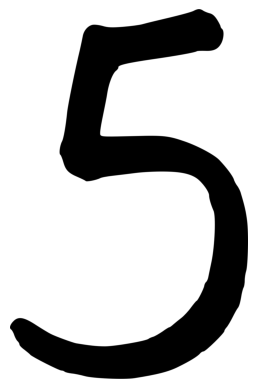

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and resize new image
image_path = 'five.png'

# Read the image file
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [15]:
import cv2
import numpy as np

# Load and resize new image
image_path = 'five.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))

# Flatten and preprocess the image
flattened_image = resized_image.flatten().reshape(1, 784)
preprocessed_image = flattened_image.astype('float32') / 255.0

# Use the model to predict the class label
prediction = model.predict(preprocessed_image)
predicted_label = prediction.argmax()
print("Predicted_label:",predicted_label)

1/1 [==============================] - 0s 18ms/step
Predicted_label: 5
